In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/tmp') 
#存資料到temp
!unzip /content/drive/MyDrive/電腦視覺/Final_Project/train.zip
!unzip /content/drive/MyDrive/電腦視覺/Final_Project/test.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: test/油菜/2021.jpg    
  inflating: test/油菜/2024.jpg    
  inflating: test/油菜/2025.jpg    
  inflating: test/油菜/2035.jpg    
  inflating: test/油菜/2038.jpg    
  inflating: test/油菜/2039.jpg    
  inflating: test/油菜/2041.jpg    
  inflating: test/油菜/2047.jpg    
  inflating: test/油菜/2059.jpg    
  inflating: test/油菜/2061.jpg    
  inflating: test/油菜/2068.jpg    
  inflating: test/油菜/2072.jpg    
  inflating: test/油菜/2077.jpg    
  inflating: test/油菜/2085.jpg    
  inflating: test/油菜/2087.jpg    
  inflating: test/油菜/2093.jpg    
  inflating: test/油菜/2097.jpg    
  inflating: test/油菜/2113.jpg    
  inflating: test/油菜/2118.jpg    
  inflating: test/油菜/2121.jpg    
  inflating: test/油菜/2129.jpg    
  inflating: test/油菜/2147.jpg    
  inflating: test/油菜/2151.jpg    
  inflating: test/油菜/2156.jpg    
  inflating: test/油菜/2157.jpg    
  inflating: test/油菜/2162.jpg    
  inflating: test/油菜/2163.jpg    
  inflating: test/油菜/2172.jpg    
  inflating: test/油菜/2179.j

In [ ]:
#列出每個種類的資料數
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import random
class_list = os.listdir('/tmp/train')
max_len=0
min_len=1000
for i in range(len(class_list)):
  imagelist= os.listdir('/tmp/train/'+class_list[i])
  print(class_list[i],len(imagelist))
  if min_len>len(imagelist):
    min_len=len(imagelist)
  if max_len<len(imagelist):
    max_len=len(imagelist)
print("min_len:",min_len) #紀錄最小資料數
print("max_len:",max_len) #紀錄最大資料數

糖醋雞丁 606
福山萵苣 104
有機小松菜 513
葡萄 559
白菜滷 476
木瓜 648
香蕉 640
大陸妹 573
麻油雞 613
蒜泥白肉 518
白米飯 503
滷雞腿 672
什錦炒麵 628
咖哩雞 609
橘子 617
空心菜 656
馬鈴薯燉肉 553
油菜 586
麥克雞塊 524
紅蘿蔔炒蛋 620
客家小炒 611
瓜仔肉 643
青江菜 479
芥藍菜 333
小番茄 681
棗子 690
麻婆豆腐 569
柳丁 572
義大利麵 659
沙茶肉片 511
鳳梨 578
玉米炒蛋 549
有機青松菜 396
高麗菜 484
三杯雞 535
塔香海茸 548
滷蛋 616
洋蔥炒蛋 492
鹽酥雞 603
西瓜 640
豆芽菜 655
關東煮 542
鵝白菜 563
螞蟻上樹 496
菠菜 608
香酥魚排 672
蓮霧 436
蒸蛋 507
番茄炒蛋 502
黑胡椒豬柳 547
min_len: 104
max_len: 690


In [ ]:
def check_img(imagelist,img_len):
  rand=random.randint(0,img_len-1)
  while 1:
    if imagelist[rand][len(imagelist[rand])-3:len(imagelist[rand])]=='jpg':
      return rand
    else:
      rand=random.randint(0,img_len-1)

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')
for i in range(len(class_list)):
  imagelist= os.listdir('/tmp/train/'+class_list[i])
  img_len=len(imagelist)
  if len(imagelist)==0 or len(imagelist)==max_len:
    continue
  else:
    for j in range(max_len-len(imagelist)):
      rand=check_img(imagelist,img_len) #隨機取某種類中的一張照片
      path='/tmp/train/'+str(class_list[i])+'/'+str(imagelist[rand])
      tem_img=load_img(path)
      tem_img=img_to_array(tem_img)
      tem_img = tem_img.reshape((1,) + tem_img.shape)
      save_path='/tmp/train/'+str(class_list[i])
      # 產生新照片
      gener=datagen.flow(tem_img,
          batch_size=64,
          shuffle=False,
          save_to_dir=save_path,
          save_prefix='trans_'+str(j),
          save_format='jpg')
      gener.next()

In [ ]:
for i in range(len(class_list)):
  imagelist= os.listdir('/tmp/train/'+class_list[i])
  print(class_list[i],len(imagelist))

糖醋雞丁 690
福山萵苣 690
有機小松菜 690
葡萄 690
白菜滷 690
木瓜 690
香蕉 690
大陸妹 690
麻油雞 690
蒜泥白肉 690
白米飯 690
滷雞腿 690
什錦炒麵 690
咖哩雞 690
橘子 690
空心菜 690
馬鈴薯燉肉 690
油菜 690
麥克雞塊 690
紅蘿蔔炒蛋 690
客家小炒 690
瓜仔肉 690
青江菜 690
芥藍菜 690
小番茄 690
棗子 690
麻婆豆腐 690
柳丁 690
義大利麵 690
沙茶肉片 690
鳳梨 690
玉米炒蛋 690
有機青松菜 690
高麗菜 690
三杯雞 690
塔香海茸 690
滷蛋 690
洋蔥炒蛋 690
鹽酥雞 690
西瓜 690
豆芽菜 690
關東煮 690
鵝白菜 690
螞蟻上樹 690
菠菜 690
香酥魚排 690
蓮霧 690
蒸蛋 690
番茄炒蛋 690
黑胡椒豬柳 690


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.compat.v2 as tf

IMG_SIZE = 180
# IMG_SIZE = 224
NUM_CLASSES = 50
batch_size = 64
base_dir='/tmp/train'
train_ds = image_dataset_from_directory(
    directory=base_dir,
    validation_split=0.2,
    subset='training',
    seed=10,
    batch_size=batch_size,
    image_size=(IMG_SIZE,IMG_SIZE))
val_ds = image_dataset_from_directory(
    directory=base_dir,
    validation_split=0.2,
    seed=10,
    subset='validation',
    batch_size=batch_size,
    image_size=(IMG_SIZE,IMG_SIZE))
class_names = train_ds.class_names

Found 34498 files belonging to 50 classes.
Using 27599 files for training.
Found 34498 files belonging to 50 classes.
Using 6899 files for validation.


In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

# 從 Google API 上下載字體放到暫存資料夾底下
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

# 指定字體
font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

--2022-06-22 11:26:04--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c0c::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   137MB/s    in 0.8s    

2022-06-22 11:26:05 (137 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  
  inflating

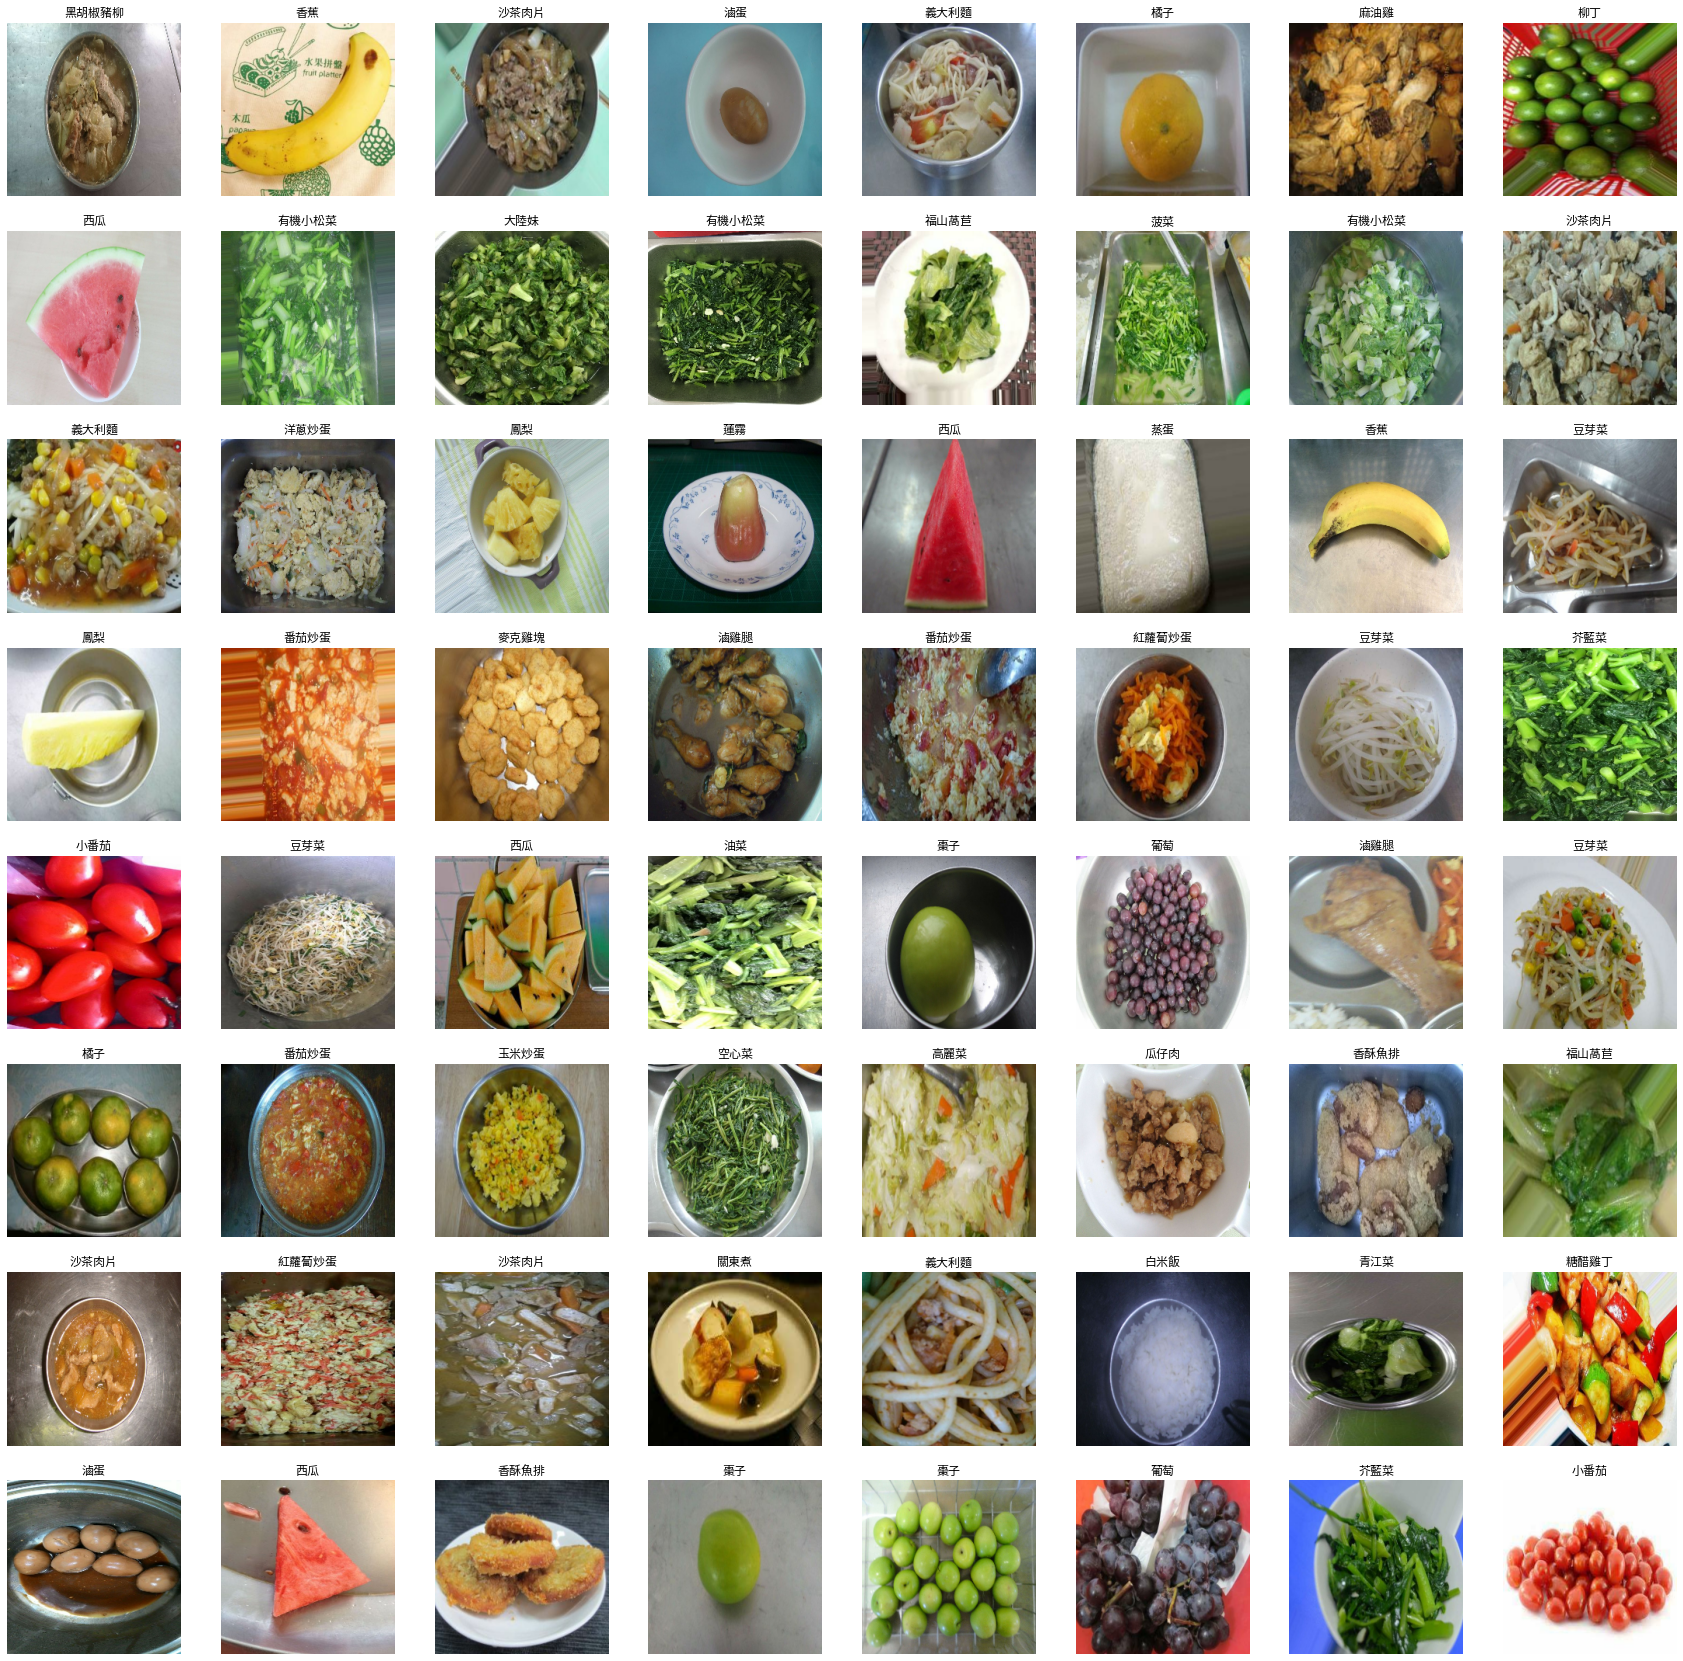

In [ ]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

data_augmentation = Sequential(
  [
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomContrast(0.1),
  ],
  name="img_augmentation",
)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
Xception = Xception(include_top=False, weights='imagenet')
x=Xception(x)
# EfficientNetB0 = EfficientNetB0(include_top=False, weights='imagenet')
# x=EfficientNetB0(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
# # freeze the weight
# Xception.trainable = False
# EfficientNetB0.trainable = False
model = Model(inputs,outputs)
model.compile(loss='sparse_categorical_crossentropy',
      optimizer=optimizers.Adamax(learning_rate=1e-4),
      metrics=['accuracy',tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top5 accuracy")]
      )
model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 img_augmentation (Sequentia  (None, 224, 224, 3)      0         
 l)                                                              
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 avg_pool (GlobalAveragePool  (None, 2048)             0         
 ing2D)                                                          
                                                              

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20,
  callbacks=[callback,model_checkpoint_callback]
)
model.load_weights(checkpoint_filepath)

Epoch 1/20
432/432 [==============================] - 580s 1s/step - loss: 2.4863 - accuracy: 0.3459 - top5 accuracy: 0.6549 - val_loss: 1.3024 - val_accuracy: 0.6041 - val_top5 accuracy: 0.9103
Epoch 2/20
432/432 [==============================] - 577s 1s/step - loss: 1.2089 - accuracy: 0.6190 - top5 accuracy: 0.9204 - val_loss: 0.9246 - val_accuracy: 0.7087 - val_top5 accuracy: 0.9529
Epoch 3/20
432/432 [==============================] - 583s 1s/step - loss: 0.9211 - accuracy: 0.6997 - top5 accuracy: 0.9525 - val_loss: 0.7802 - val_accuracy: 0.7462 - val_top5 accuracy: 0.9672
Epoch 4/20
432/432 [==============================] - 585s 1s/step - loss: 0.7638 - accuracy: 0.7501 - top5 accuracy: 0.9701 - val_loss: 0.6962 - val_accuracy: 0.7721 - val_top5 accuracy: 0.9742
Epoch 5/20
432/432 [==============================] - 585s 1s/step - loss: 0.6587 - accuracy: 0.7837 - top5 accuracy: 0.9766 - val_loss: 0.6681 - val_accuracy: 0.7810 - val_top5 accuracy: 0.9755
Epoch 6/20
432/432 [=====

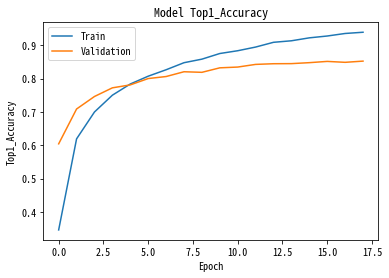

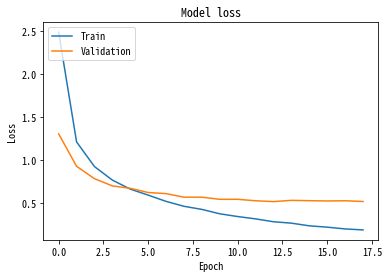

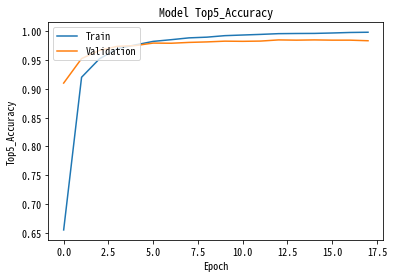

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Top1_Accuracy')
plt.ylabel('Top1_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['top5 accuracy'])
plt.plot(history.history['val_top5 accuracy'])
plt.title('Model Top5_Accuracy')
plt.ylabel('Top5_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [ ]:
# 模型輸出儲存的檔案
WEIGHTS_FINAL = '/content/drive/MyDrive/電腦視覺/Final_Project/Xception.h5'
# 儲存訓練好的模型
model.save(WEIGHTS_FINAL) 

In [ ]:
from tensorflow.python.keras.models import load_model
WEIGHTS_FINAL = '/content/drive/MyDrive/電腦視覺/Final_Project/Xception.h5'
# 載入訓練好的模型
model = keras.models.load_model(WEIGHTS_FINAL)

    0.993  青江菜
    0.005  有機青松菜
    0.001  油菜
    0.000  有機小松菜
    0.000  大陸妹


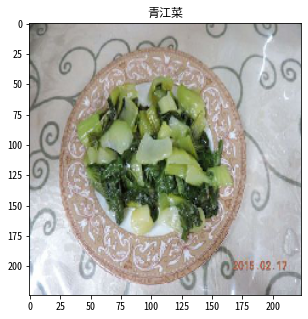

In [ ]:
base_dir='/tmp/test'
lab_rand = class_names[np.random.randint(0,49)] #50種挑其中一類
testdir = os.path.join(base_dir,lab_rand) #選出所在種類的資料路徑
#選出其中一張照片的路徑
testimg=os.path.join(testdir,os.listdir(testdir)[np.random.randint(0,len(testdir)-1)])	
x = load_img(testimg,target_size=(180,180))
# x = load_img(testimg,target_size=(224,224))
img=x
#模型輸出種類及預測機率 top-5
x = np.expand_dims(x, axis = 0) 
pred = model.predict(x)[0]
top_inds = pred.argsort()[::-1][:5]
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(lab_rand)
for i in top_inds:
  print('    {:.3f}  {}'.format(pred[i], class_names[i]))

In [ ]:
predict=[]
ave_acc=[]
actual=[]
for cls in range(len(class_names)):
  imagelist= os.listdir('/tmp/test/'+class_names[cls])
  total_acc=0
  if len(imagelist)==0:
    continue
  else:
    for img in range(len(imagelist)):
      actual.append(cls)
      path='/tmp/test/'+str(class_names[cls])+'/'+str(imagelist[img])
      tem_img=load_img(path,target_size=(IMG_SIZE,IMG_SIZE))	
      tem_img = np.expand_dims(tem_img, axis = 0) 
      pred = model.predict(tem_img)[0]
      top_inds = pred.argsort()[::-1][:1]
      for top1 in top_inds:
        total_acc=total_acc+pred[top1]
        predict.append(top1)
    ave_acc.append(total_acc/len(imagelist))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
# from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
mat = confusion_matrix(actual,predict)
plt.figure(figsize=(150, 150))#點擊放大比較清楚
# cmap='OrRd',fmt='g'
sn.heatmap(mat,square= True, annot=True, cbar= False,cmap='OrRd',fmt='g')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.show()

In [ ]:
for i in range(len(class_names)):
  max_val=0
  max_cls=''
  sec_val=0
  sec_cls=''
  imagelist= os.listdir('/tmp/test/'+class_names[i])
  for j in range(len(class_names)):
    if i!=j:
      if mat[j][i]>sec_val:
        sec_val=mat[j][i]
        sec_cls=class_names[j]
    if mat[j][i]>max_val:
      max_val=mat[j][i]
      max_cls=class_names[j]
  if class_names[i]!=max_cls:
    print('Actual： {:10} Max_predict： {:10}'.format(class_names[i],max_cls))
  if sec_val/len(imagelist)>0.2 and max_cls!=sec_cls:
    print('Actual： {:10} Sec_predict： {:10}'.format(class_names[i],sec_cls))

Actual： 有機小松菜      Sec_predict： 油菜        
Actual： 沙茶肉片       Sec_predict： 蒜泥白肉      
Actual： 油菜         Sec_predict： 有機小松菜     
Actual： 福山萵苣       Max_predict： 大陸妹       


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(actual,predict))
print("Report:\n",classification_report(actual,predict,target_names=class_names))

Accuracy score: 0.8070225520982015
Report:
               precision    recall  f1-score   support

         三杯雞       0.74      0.75      0.75       134
        什錦炒麵       0.84      0.75      0.80       158
         咖哩雞       0.83      0.76      0.79       153
        塔香海茸       0.95      0.88      0.91       137
         大陸妹       0.71      0.58      0.64       144
        客家小炒       0.82      0.75      0.78       153
         小番茄       0.99      0.92      0.95       171
       有機小松菜       0.31      0.47      0.37       129
       有機青松菜       0.54      0.62      0.58        99
          木瓜       0.94      0.98      0.96       162
          柳丁       0.84      0.84      0.84       143
          棗子       0.98      0.96      0.97       173
          橘子       0.87      0.88      0.88       155
        沙茶肉片       0.44      0.44      0.44       128
          油菜       0.42      0.35      0.38       147
        洋蔥炒蛋       0.93      0.81      0.87       124
          滷蛋       0.88      0.94    

In [ ]:
print("Average accuracy：\n")
top_acc=sorted(ave_acc, reverse = True)
top_class=[]
while len(top_class)<49:
  for i in range(len(class_names)):
    for j in range(len(class_names)):
      if top_acc[i]==ave_acc[j]:
        top_class.append(class_names[j])
        break
for k in range(len(class_names)):
  if k < 9:
    print('  精準度Top.0{}： {:.3f}  {}'.format(k+1,top_acc[k], top_class[k]))
  else:
    print('  精準度Top.{}： {:.3f}  {}'.format(k+1,top_acc[k], top_class[k]))

Average accuracy：

  精準度Top.01： 0.991  香蕉
  精準度Top.02： 0.981  蓮霧
  精準度Top.03： 0.981  木瓜
  精準度Top.04： 0.977  葡萄
  精準度Top.05： 0.976  西瓜
  精準度Top.06： 0.975  白米飯
  精準度Top.07： 0.969  棗子
  精準度Top.08： 0.968  滷蛋
  精準度Top.09： 0.961  鳳梨
  精準度Top.10： 0.956  玉米炒蛋
  精準度Top.11： 0.954  番茄炒蛋
  精準度Top.12： 0.950  橘子
  精準度Top.13： 0.945  小番茄
  精準度Top.14： 0.944  豆芽菜
  精準度Top.15： 0.943  麥克雞塊
  精準度Top.16： 0.942  蒸蛋
  精準度Top.17： 0.942  高麗菜
  精準度Top.18： 0.941  滷雞腿
  精準度Top.19： 0.940  柳丁
  精準度Top.20： 0.937  關東煮
  精準度Top.21： 0.937  香酥魚排
  精準度Top.22： 0.930  紅蘿蔔炒蛋
  精準度Top.23： 0.926  螞蟻上樹
  精準度Top.24： 0.920  塔香海茸
  精準度Top.25： 0.908  馬鈴薯燉肉
  精準度Top.26： 0.906  洋蔥炒蛋
  精準度Top.27： 0.901  瓜仔肉
  精準度Top.28： 0.890  鵝白菜
  精準度Top.29： 0.884  麻婆豆腐
  精準度Top.30： 0.883  什錦炒麵
  精準度Top.31： 0.870  鹽酥雞
  精準度Top.32： 0.869  白菜滷
  精準度Top.33： 0.866  客家小炒
  精準度Top.34： 0.862  糖醋雞丁
  精準度Top.35： 0.861  義大利麵
  精準度Top.36： 0.858  咖哩雞
  精準度Top.37： 0.855  三杯雞
  精準度Top.38： 0.843  空心菜
  精準度Top.39： 0.824  福山萵苣
  精準度Top.40： 0.822  黑胡椒豬柳
  精準度Top.41： 